In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import statsmodels

In [2]:
age_data = pd.read_csv('AgeGroupDetails.csv')
Hospitals_data = pd.read_csv('HospitalBedsIndia.csv')
covid_19_india = pd.read_csv('covid_19_india.csv')
Testing_Details = pd.read_csv('ICMRTestingDetails.csv')
Testing_Labs = pd.read_csv('ICMRTestingLabs.csv')
Individual_Details = pd.read_csv('IndividualDetails.csv')
Pop_Census = pd.read_csv('population_india_census2011.csv')
Statewise_Testing = pd.read_csv('StatewiseTestingDetails.csv')

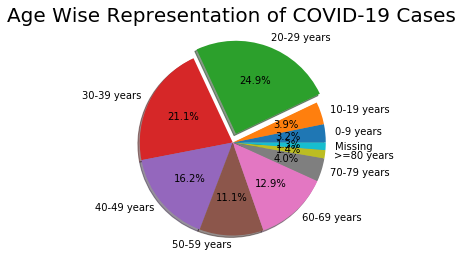

In [3]:
labels = '0-9 years','10-19 years' , '20-29 years','30-39 years','40-49 years','50-59 years','60-69 years','70-79 years','>=80 years','Missing'
sizes = age_data['TotalCases']
explode = (0,0,0.1,0,0,0,0,0,0,0) 

fig1, ax1 = plt.subplots()
plt.pie(sizes,labels=labels , autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=0)
ax1.axis('equal') 
plt.title('Age Wise Representation of COVID-19 Cases' , fontsize = 20)

plt.show()


Therefore, we can conclude from the figure that the maximum number of infected people lie in the age group of 20-29 years, followed by the age group of 30-39 years.

In [4]:
patients_gender = Individual_Details[['gender']].dropna()
patients_gender_unchanged = Individual_Details[['gender']]

In [5]:
labels2 = 'Missing','Male','Female'
sizes2 = []
explode = (0 , 0.1 , 0)
sizes2.append(Individual_Details['gender'].isnull().sum())
sizes2.append(list(Individual_Details['gender'].value_counts())[0])
sizes2.append(list(Individual_Details['gender'].value_counts())[1])

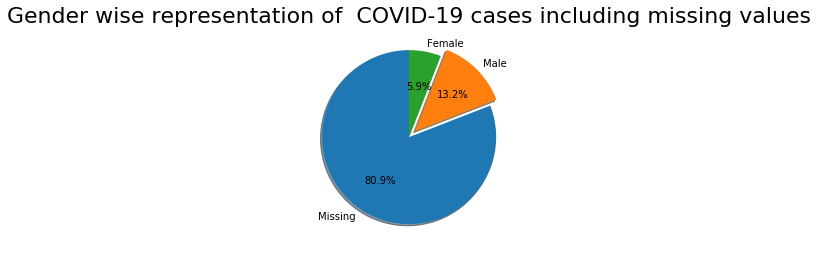

In [6]:
plt.title('Gender wise representation of  COVID-19 cases including missing values' , fontsize = 22)
plt.pie(sizes2, labels = labels2 , explode = explode, autopct='%1.1f%%' , shadow = True , startangle = 90)
plt.show()

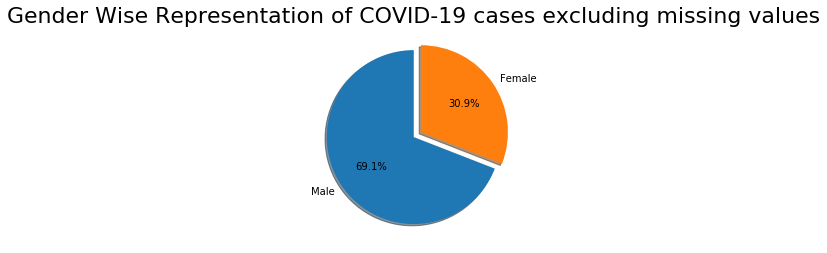

In [7]:
Individual_Details['gender'].dropna()
sizes3 = []
labels3 = 'Male','Female'
sizes3.append(Individual_Details['gender'].value_counts()[0])
sizes3.append(Individual_Details['gender'].value_counts()[1])
explode3 = (0,0.1)
plt.pie(sizes3,labels = labels3 , explode = explode3 , shadow = True, startangle = 90,autopct='%1.1f%%')
plt.title('Gender Wise Representation of COVID-19 cases excluding missing values' , fontsize = 22)
plt.show()

Therefore it is clear that males are more affected than females

In [8]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed" data-src="story/258632" data-url="https://flo.uri.sh/story/258632/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

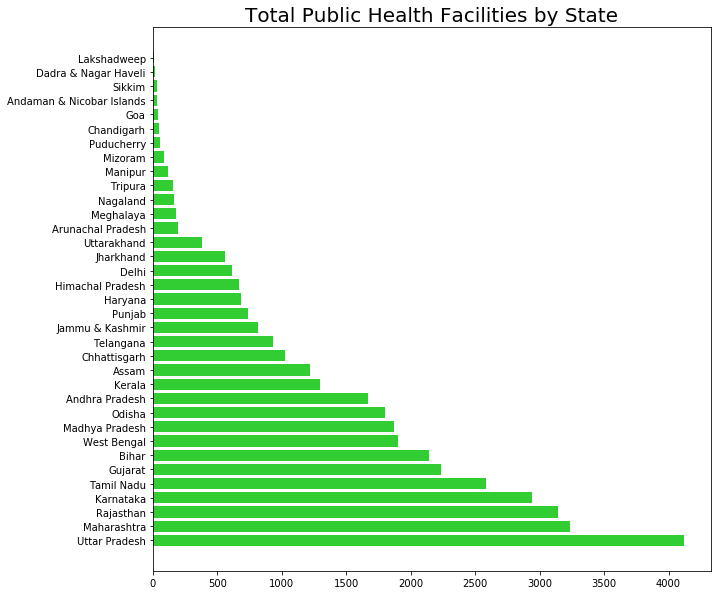

In [9]:
plt.rcParams['figure.figsize'] = (10,10)
Hospitals_data_sort1 = Hospitals_data.sort_values('TotalPublicHealthFacilities_HMIS' ,ascending = False)
Hospitals_data_sort1 = Hospitals_data_sort1.drop([36])
Hospitals_data_sort1 = Hospitals_data_sort1[0:35]
plt.barh(Hospitals_data_sort1['State/UT'],Hospitals_data_sort1['TotalPublicHealthFacilities_HMIS'][:35],color='limegreen')
plt.title('Total Public Health Facilities by State' , fontsize = 20)
plt.show()



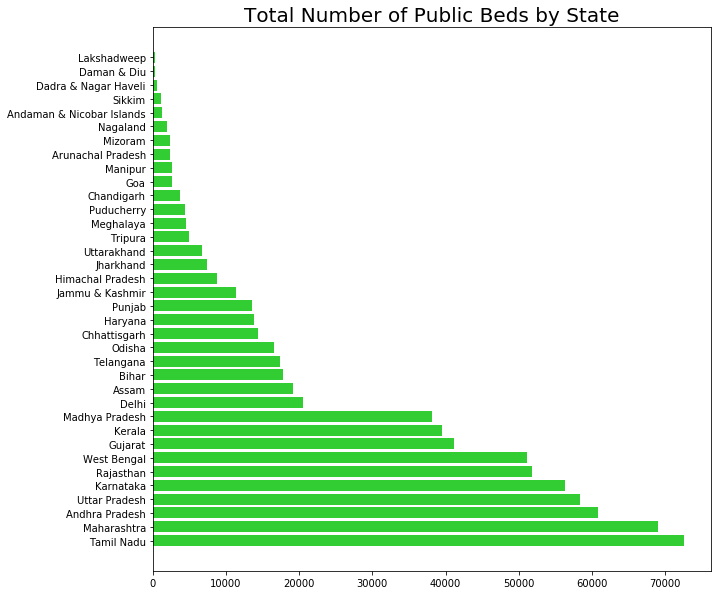

In [10]:
Hospitals_data_sort2 = Hospitals_data.sort_values('NumPublicBeds_HMIS',ascending = False)
#Hospitals_data_sort2 = Hospitals_data_sort2[:35]
Hospitals_data_sort2 = Hospitals_data_sort2.drop([36])
plt.barh(Hospitals_data_sort2['State/UT'],Hospitals_data_sort2['NumPublicBeds_HMIS'],color='limegreen')
plt.title('Total Number of Public Beds by State' , fontsize = 20)
plt.show()

It's evident that Tamil Nadu has the most number of beds, followed by Maharashtra. However this information may be misleading due to the each of these states having different population size

In [11]:
Pop_Census_sort1 = Pop_Census.sort_values('State / Union Territory')
Hospitals_data_sort3 = Hospitals_data.sort_values('State/UT')

In [12]:
Hospitals_data_sort3 = Hospitals_data_sort3.drop([36])
Hospitals_data_sort3.index = Pop_Census_sort1.index
Hospitals_data_sort3['Population'] = Pop_Census_sort1['Population']

In [13]:
Hospitals_data_sort3['Population in Thousands'] = Hospitals_data_sort3['Population']/1000
Hospitals_data_sort3['Beds per Thousands'] = Hospitals_data_sort3['NumPublicBeds_HMIS']/Hospitals_data_sort3['Population in Thousands']

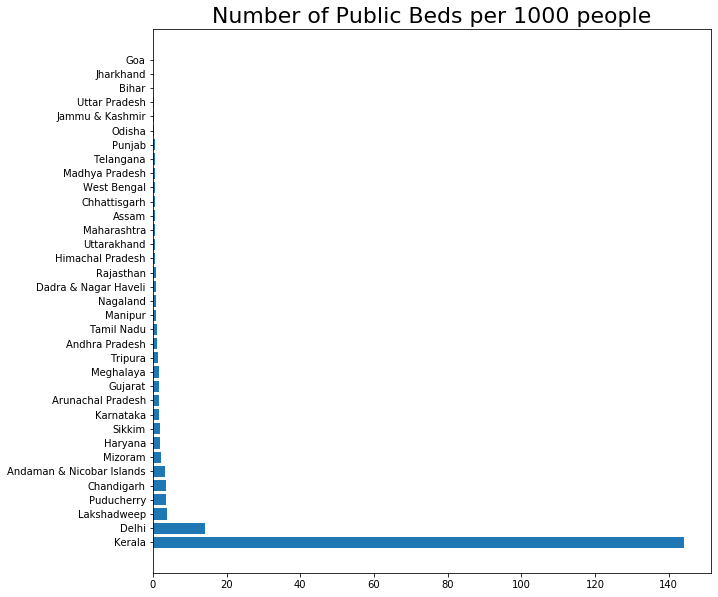

Nationwide Average : 5.685237454413778


In [14]:
Hospitals_data_sort4 = Hospitals_data_sort3.sort_values('Beds per Thousands' , ascending = False)
Hospitals_data_sort4 = Hospitals_data_sort4[:35]
beds_mean = Hospitals_data_sort4['Beds per Thousands'].mean()
plt.barh(Hospitals_data_sort4['State/UT'],Hospitals_data_sort4['Beds per Thousands'])
plt.title('Number of Public Beds per 1000 people',fontsize=22)
plt.show()
print('Nationwide Average : ' + str(beds_mean))

This is a staggering figure. The states with large number of beds are clearly not catering to their large population base, and the nationwide average of 5.6 beds per 1000 people is clearly low

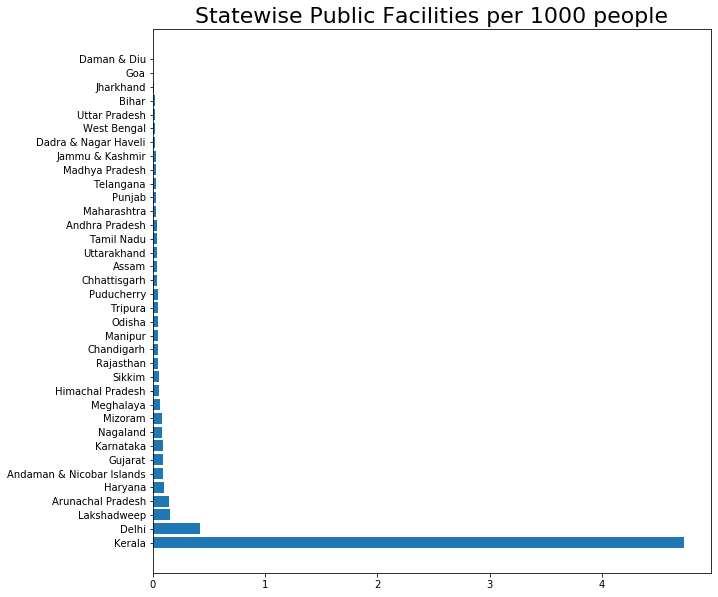

Nationwise Average : 0.18963220539568734


In [15]:
Hospitals_data_sort3['Healthcare Facilities per Thousands'] = Hospitals_data_sort3['TotalPublicHealthFacilities_HMIS']/Hospitals_data_sort3['Population in Thousands']
Hospitals_data_sort5 = Hospitals_data_sort3.sort_values('Healthcare Facilities per Thousands' , ascending = False)
plt.barh(Hospitals_data_sort5['State/UT'],Hospitals_data_sort5['Healthcare Facilities per Thousands'])
plt.title('Statewise Public Facilities per 1000 people',fontsize = 22)
plt.show()
publichealth_mean = Hospitals_data_sort5['Healthcare Facilities per Thousands'].mean()
print('Nationwise Average : ' + str(publichealth_mean))


Another staggering find, the country's public health facilites are in shambles, with an average of 0.1 public health facilities per thousand people

In [16]:
covid_19_pivot = pd.pivot_table(covid_19_india, index = ['State/UnionTerritory'], values = ['Confirmed','Deaths','Cured'], aggfunc = 'max')

In [17]:
covid_19_pivot['Cure Rate'] = np.round(covid_19_pivot['Cured']/covid_19_pivot['Confirmed'] , decimals = 2)  
covid_19_pivot['Death Rate'] = np.round(covid_19_pivot['Deaths']/covid_19_pivot['Confirmed'] , decimals = 2)
covid_19_pivot = covid_19_pivot.sort_values(by = 'Confirmed' , ascending = False)
covid_19_pivot.style.background_gradient(cmap = 'Reds')


//anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



,Confirmed,Cured,Deaths,Cure Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,3323,331,201,0.1,0.06
Delhi,1707,72,42,0.04,0.02
Madhya Pradesh,1355,69,69,0.05,0.05
Tamil Nadu,1323,283,15,0.21,0.01
Gujarat,1272,88,48,0.07,0.04
Rajasthan,1229,183,11,0.15,0.01
Uttar Pradesh,969,86,14,0.09,0.01
Telengana,791,186,18,0.24,0.02
Andhra Pradesh,603,42,15,0.07,0.02


In [18]:
Statewise_Testing_Pivot = pd.pivot_table(Statewise_Testing , index = ['State'] , values = ['TotalSamples','Negative','Positive'], aggfunc = 'sum')
Statewise_Testing_Pivot = Statewise_Testing_Pivot.sort_values(by = 'State' )

In [19]:
Statewise_Testing_Pivot['Population'] = [49577103 , 25545198, 16787941, 60439692, 12267032, 
                                        61095297, 33406061,72626809, 112374333,41974218,
                                        27743338,68548437,72147030]
Statewise_Testing_Pivot['Population in Thousands'] = Statewise_Testing_Pivot['Population']/1000
Statewise_Testing_Pivot['Tests per Thousands'] = Statewise_Testing_Pivot['Population in Thousands']/Statewise_Testing_Pivot['TotalSamples']
Statewise_Testing_Pivot['Tests per Positive Test'] = Statewise_Testing_Pivot['Positive']/Statewise_Testing_Pivot['TotalSamples']

In [20]:
Statewise_Testing_Pivot['States'] = ['Andhra Pradesh', 'Chandigarh',
'Delhi','Gujarat','Jammu and Kashmir','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Odisha',
'Punjab',
'Rajasthan',
'Tamil Nadu']

In [21]:
Statewise_Testing_Pivot = Statewise_Testing_Pivot[Statewise_Testing_Pivot['States'] != 'Chandigarh']

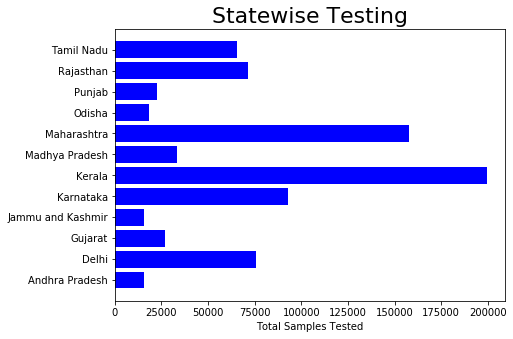

In [22]:
plt.rcParams['figure.figsize'] = (7,5)
plt.xlabel('Total Samples Tested')
plt.barh(Statewise_Testing_Pivot['States'],Statewise_Testing_Pivot['TotalSamples'],color='Blue')
plt.title('Statewise Testing' , fontsize = 22)
plt.show()


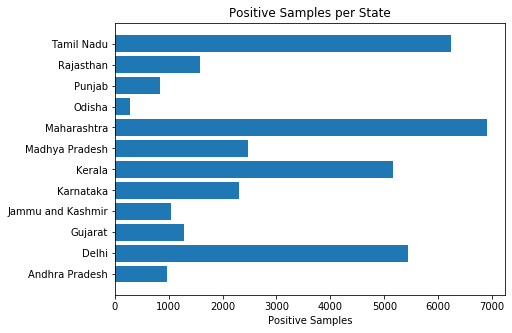

In [23]:
plt.barh(Statewise_Testing_Pivot['States'],Statewise_Testing_Pivot['Positive'])
plt.xlabel('Positive Samples')
plt.title('Positive Samples per State')
plt.show()


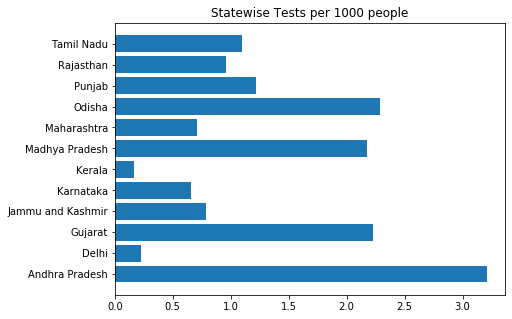

In [24]:
plt.barh(Statewise_Testing_Pivot['States'],Statewise_Testing_Pivot['Tests per Thousands'])
plt.title('Statewise Tests per 1000 people')
plt.show()

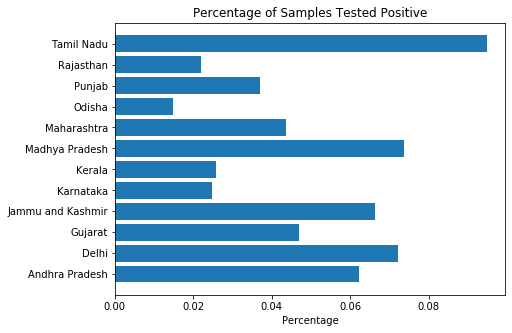

In [25]:
#Statewise_Testing_Pivot['Tests per Positive Test'] = Statewise_Testing_Pivot['Tests per Positive Test'] * 100
plt.barh(Statewise_Testing_Pivot['States'],Statewise_Testing_Pivot['Tests per Positive Test'])
plt.title('Percentage of Samples Tested Positive')
plt.xlabel('Percentage')
plt.show()

In [26]:
covid_all = pd.read_csv('covid-19-all.csv')
covid_india = covid_all[covid_all['Country/Region'] == 'India']
covid_india.index = covid_india.Date

In [27]:
covid_usa = covid_all[covid_all['Country/Region'] == 'US']
covid_usa.index = covid_usa.Date
covid_usa.index = pd.to_datetime(covid_usa.index)
covid_china = covid_all[covid_all['Country/Region'] == 'China']
covid_china.index = covid_china.Date
covid_china.index = pd.to_datetime(covid_china.index)
covid_italy = covid_all[covid_all['Country/Region'] == 'Italy']
covid_italy.index = covid_italy.Date
covid_italy.index = pd.to_datetime(covid_italy.index)
covid_france = covid_all[covid_all['Country/Region'] == 'France']
covid_france.index = covid_france.Date
covid_france.index = pd.to_datetime(covid_france.index)
covid_spain = covid_all[covid_all['Country/Region'] == 'Spain']
covid_spain.index = covid_spain.Date
covid_spain.index = pd.to_datetime(covid_spain.index)

In [29]:
covid_india2 = covid_india
covid_india2.index = pd.to_datetime(covid_india2.index)
covid_usa.index = pd.to_datetime(covid_usa.index)


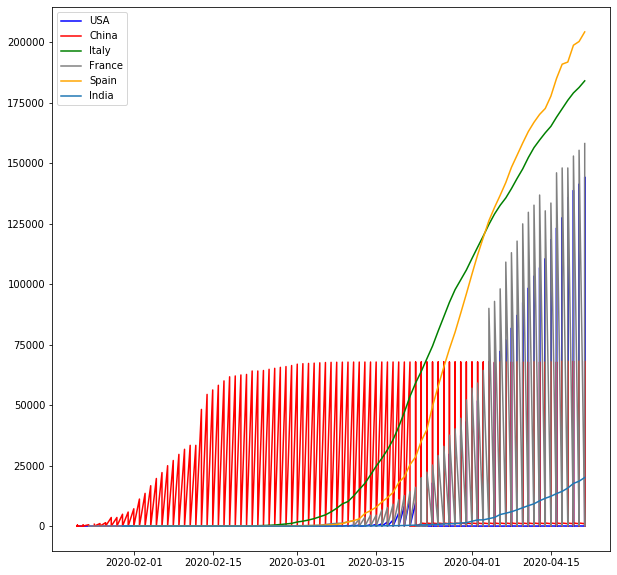

In [30]:
plt.figure(figsize = (10,10))
plt.plot(covid_usa['Confirmed'] , label = 'USA' , color = 'Blue')
plt.plot(covid_china['Confirmed'] , label = 'China' , color = 'Red')
plt.plot(covid_italy['Confirmed'] , label = 'Italy' , color = 'Green')
plt.plot(covid_france['Confirmed'], label = 'France' , color = 'Grey')
plt.plot(covid_spain['Confirmed'] , label = 'Spain' , color = 'Orange')
plt.plot(covid_india2['Confirmed'] , label = 'India'  )
plt.legend()
plt.show()


In [31]:
covid_india.index = covid_india['Date']
covid_india.index.freq = 'D'

In [32]:
covid_india['Confirmed'].autocorr()

0.9993892254921362

A high autocorrelation value indicates the series can be predicted using data from the past

In [33]:
covid_india['Change'] = covid_india['Confirmed'].diff()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



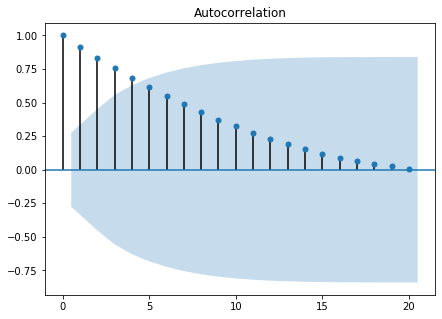

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
alpha = (2/(len(covid_india['Confirmed']))**1/2) #calculating value of alpha (confidence interval)
plot_acf(covid_india['Confirmed'] , lags = 20 , alpha = alpha)
plt.show()

In [35]:
from statsmodels.tsa.stattools import acf
print(acf(covid_india['Confirmed']))

[ 1.          0.91448934  0.83411407  0.75347554  0.68208603  0.61587248
  0.55088289  0.48954869  0.42967463  0.37343652  0.3234551   0.27569074
  0.23145191  0.19112406  0.15455172  0.12045041  0.08831882  0.06495906
  0.04416866  0.02651423  0.00763279 -0.00757638 -0.01811149 -0.02806341
 -0.03655335 -0.04525442 -0.05357921 -0.06086239 -0.06792044 -0.07420167
 -0.08046139 -0.08602843 -0.09120112 -0.09573703 -0.09994324 -0.10385868
 -0.10772676 -0.11145487 -0.1151883  -0.11887582 -0.1224238 ]


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



The plots and acf values clearly suggest that the series is highly autocorrelated with lagged versions of itself

In [36]:
# Performing Augmented Dicky Fuller Test for a random walk
from statsmodels.tsa.stattools import adfuller
result = adfuller(covid_india['Confirmed'])
print('ADF Statistic : ' + str(result[0]))
print('p value : ' + str(result[1]))

ADF Statistic : 2.9734328976707824
p value : 1.0


Hence, we can't reject the null hypothesis, and conclude that the time series is a non stationary random walk .

Since, the series is stationary, we need to convert it into a non stationary series so as to model it. Therefore we perform a ADF test on the differences and percent changes of the same. 

In [37]:
pd.options.mode.chained_assignment = None 
covid_india['Change'] = covid_india['Change'].fillna(method = 'ffill')
covid_india['Change'].dropna(how = 'any' , inplace = True)
adfuller(covid_india['Change'])
pd.options.mode.chained_assignment = None 
covid_india['PctChange'] = covid_india['Confirmed'].pct_change()
covid_india['PctChange'] = covid_india['PctChange'].dropna(how = 'any' , inplace = True)

In [ ]:
#results2 = adfuller(covid_india['PctChange'])
#print('ADF Statistic : ' + str(results2[0]))
#print('p value : ' + str(results2[1]))

The p value is almost close to 0. The time series is now a stationary white noise, and can easily be modelled

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



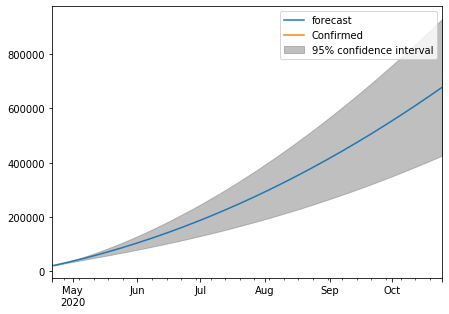

In [38]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(covid_india['Confirmed'] , order = (2,2,3))
result = mod.fit()
result.plot_predict(start = '2020-04-21' , end = '2020-10-25')
plt.show()

In [39]:
arima = ARIMA(covid_india['Confirmed'], order=(2, 2, 2))
arima = arima.fit(trend='c', full_output=True, disp=True)
#forecast = arima.forecast(steps= 30)
#pred = list(forecast[0])

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [40]:
 for i in range(1,4) :
    for j in range(1,4) :
        if (i!=3 or j!=3) :
            mod = ARIMA(covid_india['Confirmed'], order = (i, 2, j))
            mod = mod.fit(trend='c', full_output=True , disp=True)
            print('AIC for AR order ' + str(i) + ' and MA order  ' + str(j) + ' is :' + str(mod.aic))
    

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC for AR order 1 and MA order  1 is :1071.7109502191727
AIC for AR order 1 and MA order  2 is :1051.5514319098816


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC for AR order 1 and MA order  3 is :1051.8607685069915


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC for AR order 2 and MA order  1 is :1071.5185813210276


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC for AR order 2 and MA order  2 is :1053.3327311117314


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC for AR order 2 and MA order  3 is :1051.6430472613354
AIC for AR order 3 and MA order  1 is :1072.9326826687513


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC for AR order 3 and MA order  2 is :1053.1329268599077


Hence, we chose an ARIMA model with parameters (1,2,2) as it has the lowest AIC

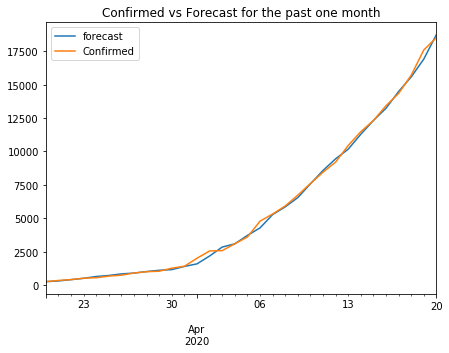

In [41]:
mod.plot_predict(start = '2020-03-20' , end = '2020-04-20')
plt.title('Confirmed vs Forecast for the past one month')
plt.show()

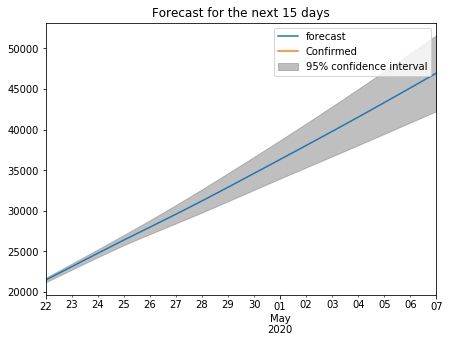

In [42]:
mod.plot_predict(start = '2020-04-22' , end = '2020-05-07')
plt.title('Forecast for the next 15 days')
plt.show()

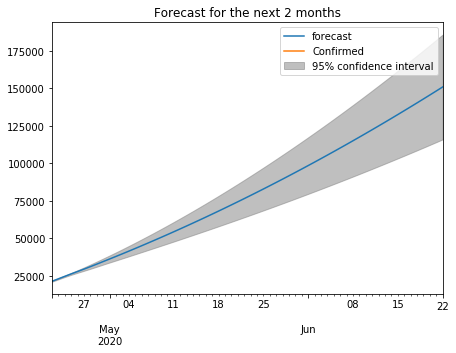

In [43]:
mod.plot_predict(start = '2020-04-22' , end = '2020-06-22')
plt.title('Forecast for the next 2 months')
plt.show()

The model forecasts a growth to more than 45000 cases in the next two weeks , and 1,50,000 cases in over the next two months

In [ ]:
#covid_india2 = covid_india
#covid_india2.index = pd.to_datetime(covid_india2.index)
#covid_usa.index = pd.to_datetime(covid_usa.index)
